# Optimizing Model

## Scaler Impact for X- and Y- data

Both X and Y values are strongly unrelated due to various types of fillers (and polymers). Deep learning does not work well with high numbers. Normally the input features need encoding or scaling to small values. In general problems, the `MinMaxScaler` and `StandardScaler` are mostly used. However, in this project, the Scaler is very important to achieve convergent model.

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import MinMaxScaler, StandardScaler
# FUNCTIONS
from functions import *

## Import data

In [2]:
filename_alldata = "data/_nanocomposite_data.csv"
alldata = pd.read_csv(filename_alldata, index_col=None, header=0)
# Drop columns which are not used for now
alldata_clean = alldata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
alldata_clean = mapStringToNum(alldata_clean)

## Prepare Dataset for TensorFlow

### Scaling X and Y data
X data might not need scaling as the range of values is not high.

In [3]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
#X_scaler = superHighVariationScalerSimple()  # `epochs` increased to 1000
#X_scaler = superHighVariationScaler(noScaler()) # `epochs` increased to 500-1000
#Y_scaler = superHighVariationScaler() 
#Y_scaler = superHighVariationScalerSimple()    # `epochs` increased to 500
#Y_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = StandardScaler()

### Splitting data to training and testing sets

In [4]:
training_data, testing_data = train_test_split(alldata_clean, test_size=0.2, random_state=25)

In [5]:
# Split into input features (X) and output labels (Y) variables
X_training = training_data.drop('conductivity', axis=1).values
Y_training = training_data[['conductivity']].values

# Pull out columns for X (data to train with) and Y (value to predict)
X_testing = testing_data.drop('conductivity', axis=1).values
Y_testing = testing_data[['conductivity']].values

### Scaling data

In [6]:
# Scale both the training inputs and outputs
X_scaled_training = X_scaler.fit_transform(X_training)
Y_scaled_training = Y_scaler.fit_transform(Y_training)

# It's very important that the training and test data are scaled with the same scaler.
X_scaled_testing = X_scaler.transform(X_testing)
Y_scaled_testing = Y_scaler.transform(Y_testing)

# Model build and complie

In [7]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, activation="relu", input_dim=3))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

model.compile(loss=tf.keras.losses.MeanAbsolutePercentageError(), 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, decay=1e-6),
             metrics = tf.keras.metrics.MeanSquaredLogarithmicError() )

In [8]:
history = model.fit(X_scaled_training, Y_scaled_training, 
                    validation_data=(X_scaled_testing, Y_scaled_testing), 
                    epochs=300, batch_size=64)

Epoch 1/300
63/63 [==============================] - 1s 7ms/step - loss: 110.0380 - mean_squared_logarithmic_error: 0.1762 - val_loss: 101.0696 - val_mean_squared_logarithmic_error: 0.1646
Epoch 2/300
63/63 [==============================] - 0s 3ms/step - loss: 106.1736 - mean_squared_logarithmic_error: 0.1770 - val_loss: 100.7764 - val_mean_squared_logarithmic_error: 0.1639
Epoch 3/300
63/63 [==============================] - 0s 3ms/step - loss: 110.2191 - mean_squared_logarithmic_error: 0.1766 - val_loss: 99.2495 - val_mean_squared_logarithmic_error: 0.1650
Epoch 4/300
63/63 [==============================] - 0s 3ms/step - loss: 99.8932 - mean_squared_logarithmic_error: 0.1779 - val_loss: 98.6191 - val_mean_squared_logarithmic_error: 0.1657
Epoch 5/300
63/63 [==============================] - 0s 3ms/step - loss: 108.3107 - mean_squared_logarithmic_error: 0.1772 - val_loss: 97.7198 - val_mean_squared_logarithmic_error: 0.1644
Epoch 6/300
63/63 [==============================] - 0s 3ms

Epoch 88/300
63/63 [==============================] - 0s 3ms/step - loss: 48.5349 - mean_squared_logarithmic_error: 0.1747 - val_loss: 48.3535 - val_mean_squared_logarithmic_error: 0.1636
Epoch 89/300
63/63 [==============================] - 0s 3ms/step - loss: 47.6044 - mean_squared_logarithmic_error: 0.1759 - val_loss: 46.8481 - val_mean_squared_logarithmic_error: 0.1632
Epoch 90/300
63/63 [==============================] - 0s 3ms/step - loss: 47.9101 - mean_squared_logarithmic_error: 0.1747 - val_loss: 48.7978 - val_mean_squared_logarithmic_error: 0.1619
Epoch 91/300
63/63 [==============================] - 0s 3ms/step - loss: 49.4375 - mean_squared_logarithmic_error: 0.1738 - val_loss: 48.9013 - val_mean_squared_logarithmic_error: 0.1608
Epoch 92/300
63/63 [==============================] - 0s 3ms/step - loss: 48.1552 - mean_squared_logarithmic_error: 0.1748 - val_loss: 47.0335 - val_mean_squared_logarithmic_error: 0.1639
Epoch 93/300
63/63 [==============================] - 0s 3ms

63/63 [==============================] - 0s 3ms/step - loss: 33.0926 - mean_squared_logarithmic_error: 0.1678 - val_loss: 31.8632 - val_mean_squared_logarithmic_error: 0.1566
Epoch 175/300
63/63 [==============================] - 0s 3ms/step - loss: 33.1295 - mean_squared_logarithmic_error: 0.1677 - val_loss: 31.5797 - val_mean_squared_logarithmic_error: 0.1558
Epoch 176/300
63/63 [==============================] - 0s 3ms/step - loss: 32.7774 - mean_squared_logarithmic_error: 0.1674 - val_loss: 31.4443 - val_mean_squared_logarithmic_error: 0.1548
Epoch 177/300
63/63 [==============================] - 0s 3ms/step - loss: 32.5288 - mean_squared_logarithmic_error: 0.1667 - val_loss: 30.8598 - val_mean_squared_logarithmic_error: 0.1553
Epoch 178/300
63/63 [==============================] - 0s 3ms/step - loss: 34.6700 - mean_squared_logarithmic_error: 0.1676 - val_loss: 32.1831 - val_mean_squared_logarithmic_error: 0.1558
Epoch 179/300
63/63 [==============================] - 0s 3ms/step - 

63/63 [==============================] - 0s 3ms/step - loss: 29.5649 - mean_squared_logarithmic_error: 0.1496 - val_loss: 27.7172 - val_mean_squared_logarithmic_error: 0.1399
Epoch 261/300
63/63 [==============================] - 0s 3ms/step - loss: 33.2405 - mean_squared_logarithmic_error: 0.1487 - val_loss: 31.0890 - val_mean_squared_logarithmic_error: 0.1411
Epoch 262/300
63/63 [==============================] - 0s 3ms/step - loss: 31.8465 - mean_squared_logarithmic_error: 0.1514 - val_loss: 28.8428 - val_mean_squared_logarithmic_error: 0.1413
Epoch 263/300
63/63 [==============================] - 0s 3ms/step - loss: 30.9617 - mean_squared_logarithmic_error: 0.1505 - val_loss: 28.8023 - val_mean_squared_logarithmic_error: 0.1405
Epoch 264/300
63/63 [==============================] - 0s 3ms/step - loss: 30.2470 - mean_squared_logarithmic_error: 0.1498 - val_loss: 28.3456 - val_mean_squared_logarithmic_error: 0.1398
Epoch 265/300
63/63 [==============================] - 0s 3ms/step - 

## Plotting predicting vs testing data

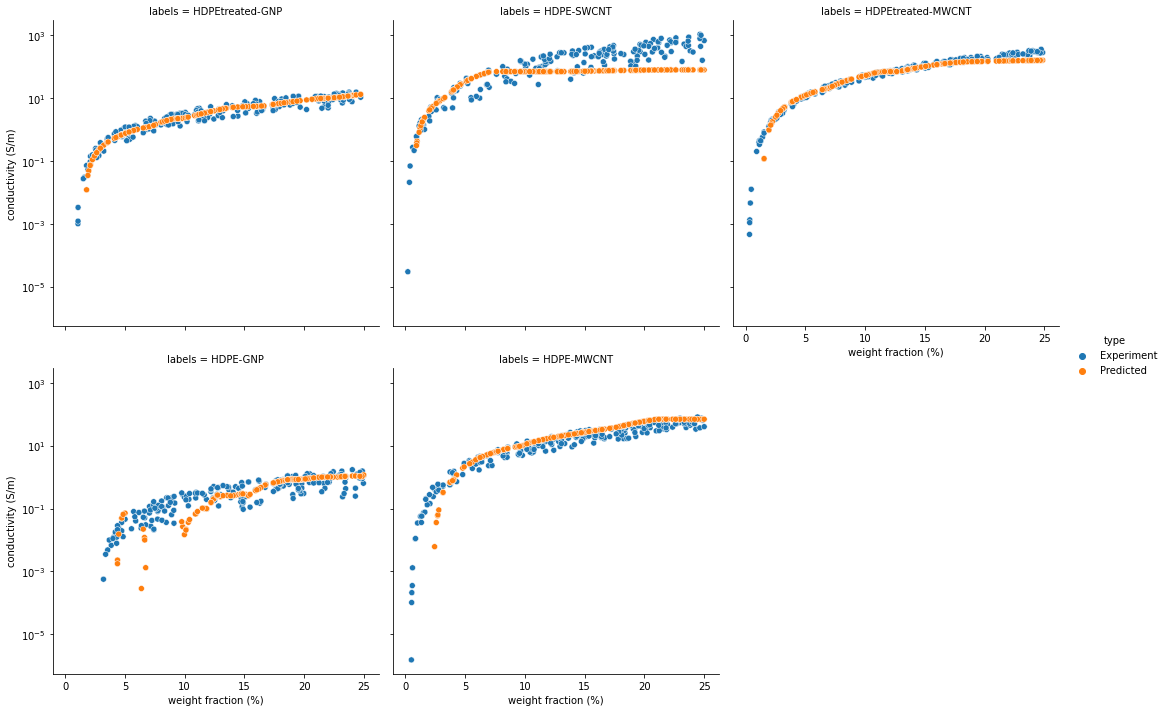

In [9]:
# Calculate predictions
PredValSet = model.predict(X_scaled_testing)
PredValSet2 = Y_scaler.inverse_transform(PredValSet)

compdata = testing_data.copy()
compdata = mapNumToString (compdata)

compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1']
compdata['type'] = 'Experiment'
compdata2 = compdata.copy()
compdata2['type'] = 'Predicted'
compdata2['conductivity'] = PredValSet2

compdata = compdata.append(compdata2, ignore_index = True)

g = sns.relplot(data=compdata ,x="wt_l1", y ="conductivity", hue="type", col="labels", kind="scatter", col_wrap =3  );
g.set_xlabels("weight fraction (%)");
g.set_ylabels("conductivity (S/m)");
g.set(yscale="log");

# Extrapolation: Estimate higher wt (>25%)

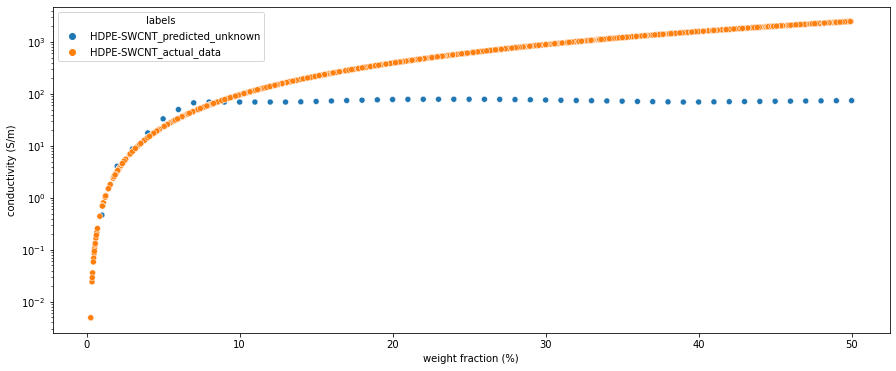

In [10]:
filename_unknowndata7 = "data-evaluation/HDPE_SWCNT_data-set-7.csv"
unknowndata7 = pd.read_csv(filename_unknowndata7, index_col=None, header=0)
unknowndata7.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1, inplace=True)   #,'foaming'
unknowndata7_clean = unknowndata7.copy()
unknowndata7_clean = mapStringToNum(unknowndata7_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata7 = unknowndata7_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata7 = X_scaler.transform(X_unknowndata7)
# Calculate predictions
PredValSet_unknowndata7 = model.predict(X_scaled_unknowndata7)
PredValSet_unknowndata72 = Y_scaler.inverse_transform(PredValSet_unknowndata7)
compdata = unknowndata7.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata72
######################
filename_data8 = "data-evaluation/HDPE_SWCNT_data-set-8.csv"
data8 = pd.read_csv(filename_data8, index_col=None, header=0)
data8['labels']= data8['polymer_1'] + "-" + data8['filler_1'] + "_actual_data"
######################
compdata = compdata.append(data8, ignore_index = True)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
g = sns.scatterplot(data=compdata ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax ,markers=["-","x"] );

# Predicting unknow case - treated HDPE + SWCNT

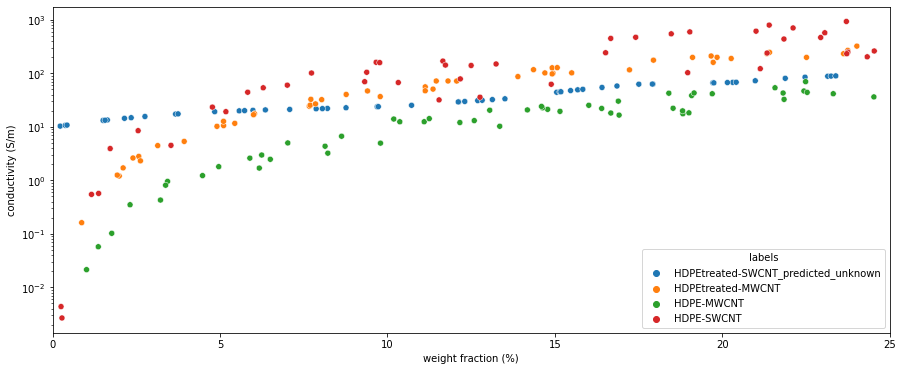

In [11]:
filename_HDPEtreated_SWCNT = "data-evaluation/HDPEtreated_SWCNT_data-set-6.csv"
data_HDPEtreated_SWCNT = pd.read_csv(filename_HDPEtreated_SWCNT, index_col=None, header=0)
data_HDPEtreated_SWCNT_clean = data_HDPEtreated_SWCNT.drop(
                                    ['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
unknowndata = data_HDPEtreated_SWCNT_clean.copy()
unknowndata['conductivity'] = float("NaN")
unknowndata_clean = unknowndata.copy()
unknowndata_clean = mapStringToNum (unknowndata_clean)
# Pull out columns for X (data to train with) and Y (value to predict)
X_unknowndata = unknowndata_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata = X_scaler.transform(X_unknowndata)
# Calculate predictions
PredValSet_unknowndata = model.predict(X_scaled_unknowndata)
PredValSet_unknowndata2 = Y_scaler.inverse_transform(PredValSet_unknowndata)
compdata = unknowndata.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata2

alldata['labels']    = alldata['polymer_1'] + "-" + alldata['filler_1']
compdata1 = alldata[alldata['filler_1'] != "GNP" ].copy()

compdata = compdata.append(compdata1, ignore_index = True)

# reduce data rows to 5% (sparse data)
drop_indices = np.random.choice(compdata.index, int(np.ceil(len(compdata.index) * 0.95) ) , replace=False)
compdata_subset = compdata.drop(drop_indices)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
plt.xlim([0,25])
g = sns.scatterplot(data=compdata_subset ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax );

# Conclusion

## Changing X-Scaler

Do not improve the Learning except strongly increasing `epochs`

## Y-Scaler

`MinMaxScaler` does not suitable for the fitting because of the discrepancy at low range of wt%, sometimes prediction is off range.

`StandardScaler` gives very good loss, but the issues are as same as `MinMaxScaler`.